## Réalisation d'un modèle de prédiction sur le jeu de donnée " heart.csv "

### 1) Imports des librairies nécessaires

In [65]:
# Import lié à la manipulation des données
import pandas as pd
import numpy as np

# Import lié à la visualisation de données
import matplotlib.pyplot as plt
import seaborn as sns

# Import liés aux modèles de prédictions
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
#Import pour l'arbre de décision
from sklearn.tree import DecisionTreeClassifier
#Import pour le RandomForest
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#Import pour la régréssion logistique
from sklearn.linear_model import LogisticRegression
#Import pour les métriques
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

from joblib import dump

### 2) Chargement des données du dataset

In [19]:
data = pd.read_csv('C:\\Users\\adrien.mirabelle\\Desktop\\Mémoire Adrien\\Prédiction_Problème_Cardiaque\\Data\\heart.csv')

### 3) Manipulation du dataset

In [28]:
print("Nombre total de données:", data.shape[0])
print("Nombre total de caractéristiques:", data.shape[1])
print("\nPremières lignes du jeu de données:")
print(data.head())



Nombre total de données: 1025
Nombre total de caractéristiques: 14

Premières lignes du jeu de données:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [29]:
print("\nStatistiques descriptives:")
print(data.describe())
print(data.isnull().sum())


Statistiques descriptives:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000

### 4) Visualisation des données

### 1) Vérification des distributions de chaque variable

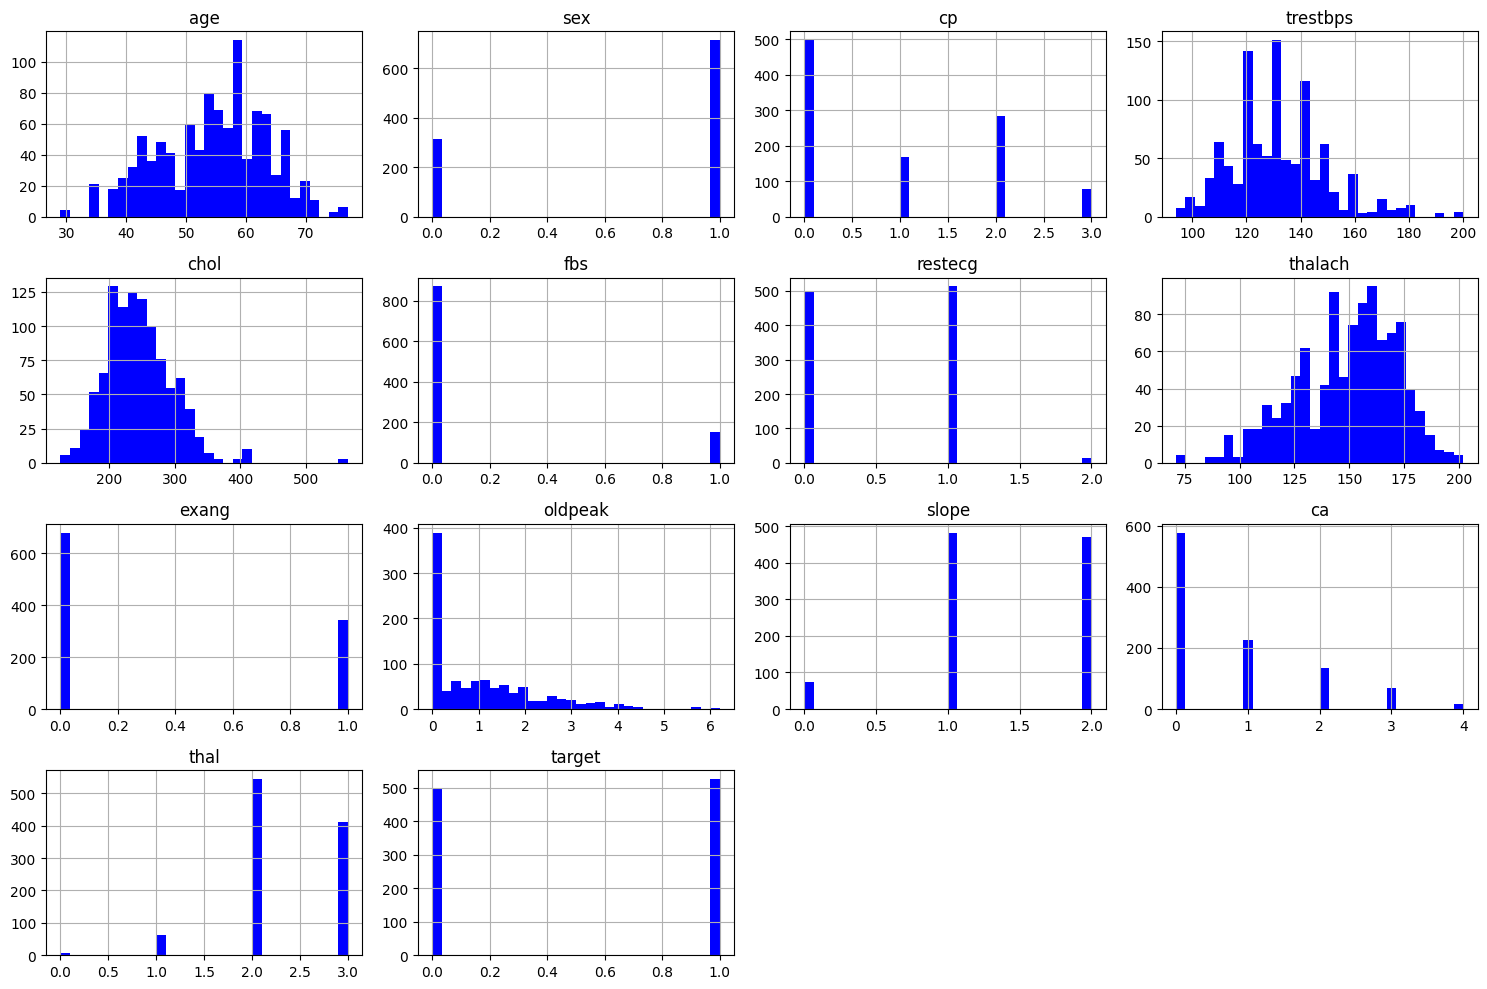

In [30]:
data.hist(bins=30, figsize=(15, 10), color='blue')
plt.tight_layout()
plt.show()


### 2) Distribution de l'âge des patients

In [31]:
sns.set(style="whitegrid")


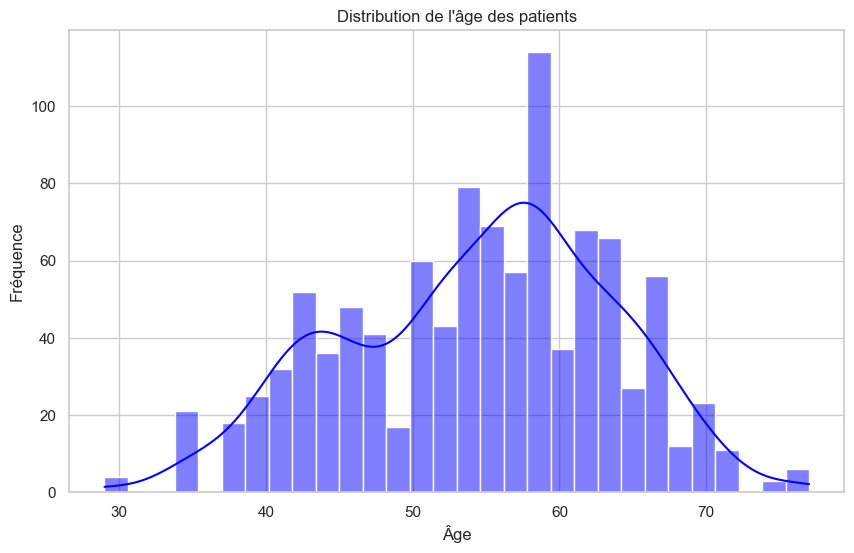

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, bins=30, color='blue')
plt.title('Distribution de l\'âge des patients')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()


### 3) Répartition des patients en fonction de leur sexe et si malade

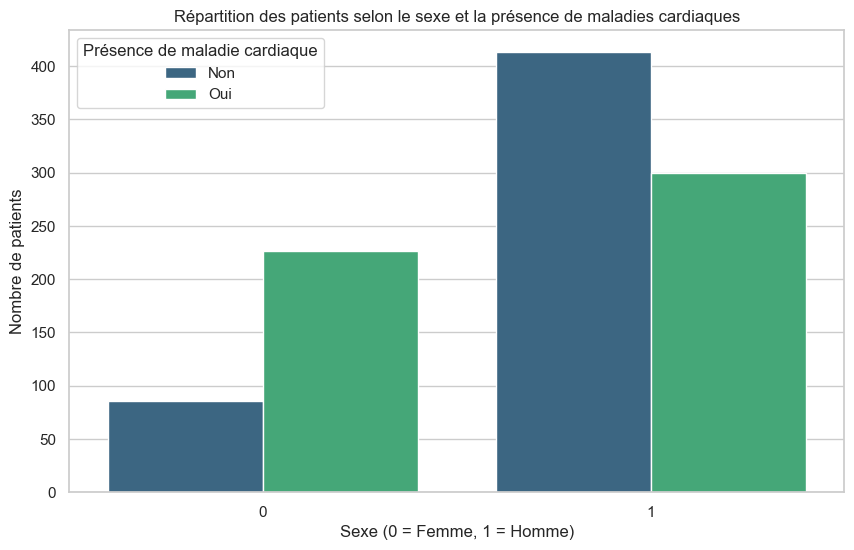

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='target', data=data, palette='viridis')
plt.title('Répartition des patients selon le sexe et la présence de maladies cardiaques')
plt.xlabel('Sexe (0 = Femme, 1 = Homme)')
plt.ylabel('Nombre de patients')
plt.legend(title='Présence de maladie cardiaque', labels=['Non', 'Oui'])
plt.show()

### 4) Fréquence cardiaque maximale atteinte pour un malade

C:\Users\adrien.mirabelle\AppData\Local\Temp\ipykernel_21728\905821419.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='thalach', data=data, palette='coolwarm')


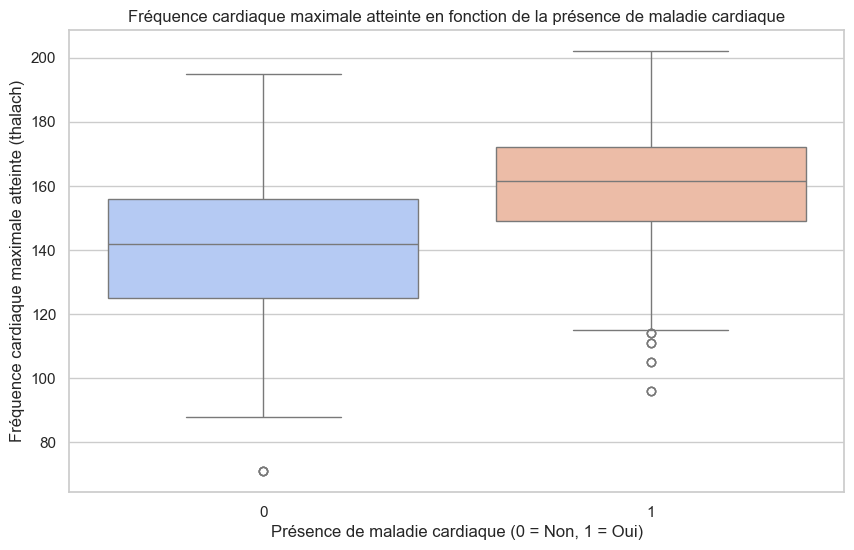

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='thalach', data=data, palette='coolwarm')
plt.title('Fréquence cardiaque maximale atteinte en fonction de la présence de maladie cardiaque')
plt.xlabel('Présence de maladie cardiaque (0 = Non, 1 = Oui)')
plt.ylabel('Fréquence cardiaque maximale atteinte (thalach)')
plt.show()

### 5) Préssion artérielle au repos

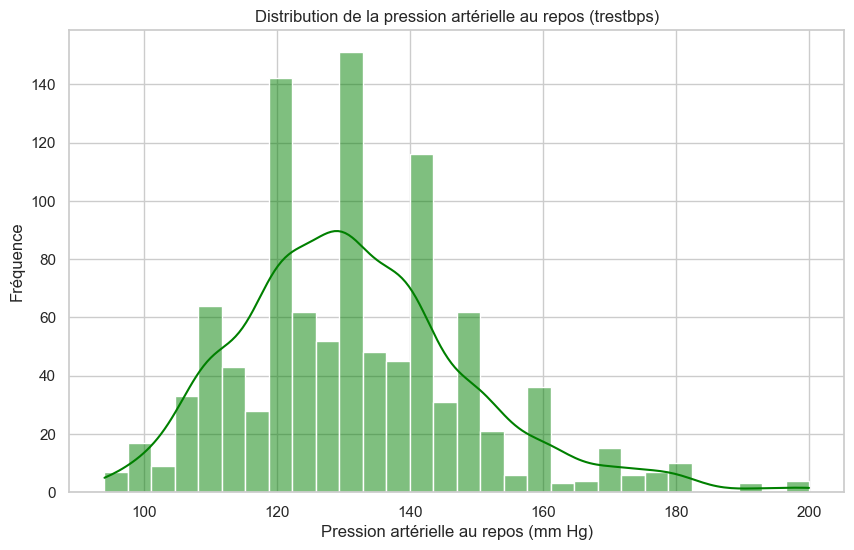

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data['trestbps'], kde=True, bins=30, color='green')
plt.title('Distribution de la pression artérielle au repos (trestbps)')
plt.xlabel('Pression artérielle au repos (mm Hg)')
plt.ylabel('Fréquence')
plt.show()


### 6) Relation entre le cholestérol et malade ?

C:\Users\adrien.mirabelle\AppData\Local\Temp\ipykernel_21728\1032726106.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='chol', data=data, palette='magma')


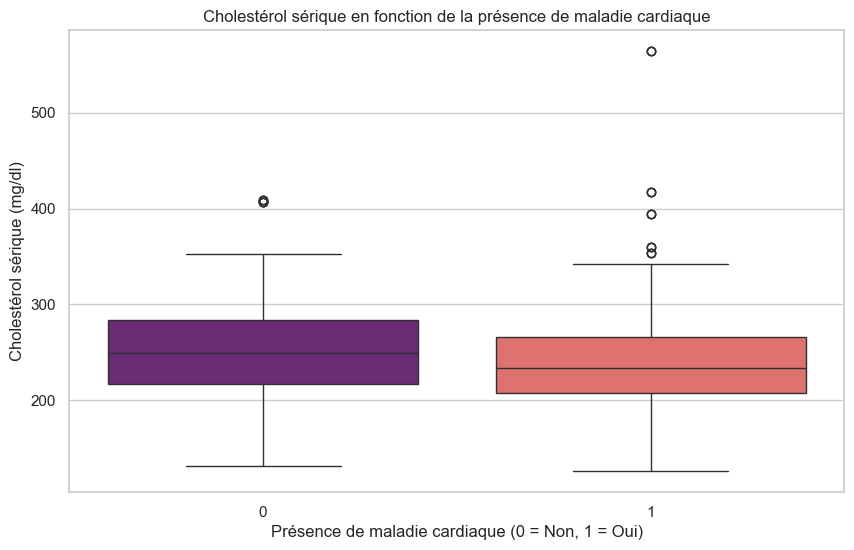

In [37]:
# Relations entre le cholestérol sérique et la présence de maladie cardiaque
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', data=data, palette='magma')
plt.title('Cholestérol sérique en fonction de la présence de maladie cardiaque')
plt.xlabel('Présence de maladie cardiaque (0 = Non, 1 = Oui)')
plt.ylabel('Cholestérol sérique (mg/dl)')
plt.show()

### Matrice de corrélation

In [38]:
corr_matrix = data.corr()
print("\nMatrice de corrélation:")
print(corr_matrix)



Matrice de corrélation:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   
fbs       0.121243  0.027200  0.079294  0.181767  0.026917  1.000000   
restecg  -0.132696 -0.055117  0.043581 -0.123794 -0.147410 -0.104051   
thalach  -0.390227 -0.049365  0.306839 -0.039264 -0.021772 -0.008866   
exang     0.088163  0.139157 -0.401513  0.061197  0.067382  0.049261   
oldpeak   0.208137  0.084687 -0.174733  0.187434  0.064880  0.010859   
slope    -0.169105 -0.026666  0.131633 -0.120445 -0.014248 -0.061902   
ca        0.271551  0.111729 -0.176206  0.104554  0.074259  0.137156   
thal      0.072297  0.198424 -0.163341 

### HeatMap de la matrice de corrélation

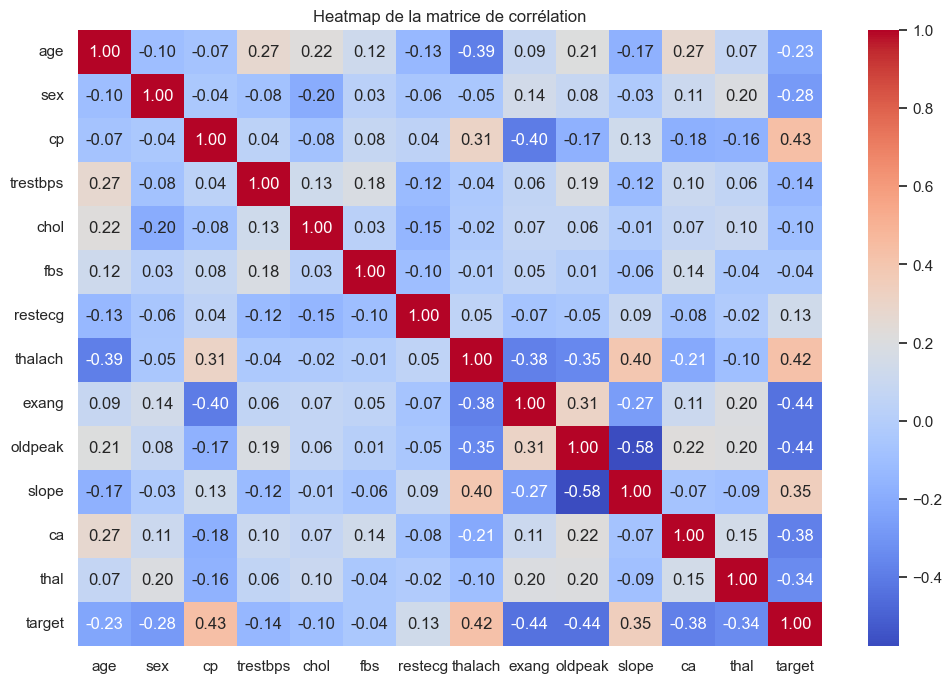

In [40]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de la matrice de corrélation')
plt.show()


## 2) Préparation à la prédiction

In [41]:
X = data.drop(columns=['target'])
y = data['target']


In [43]:
# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
# Division des données en train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Entrainement des modèles 

### 1) Arbre de décision :

In [46]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Prédiction

In [47]:
y_pred_dt = decision_tree.predict(X_test)
y_pred_proba_dt = decision_tree.predict_proba(X_test)[:, 1]

### Evaluation

In [48]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [49]:
print(f'ROC AUC: {roc_auc_dt}')
print(classification_report(y_test, y_pred_dt))

ROC AUC: 0.9854368932038835
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



### Courbe de ROC

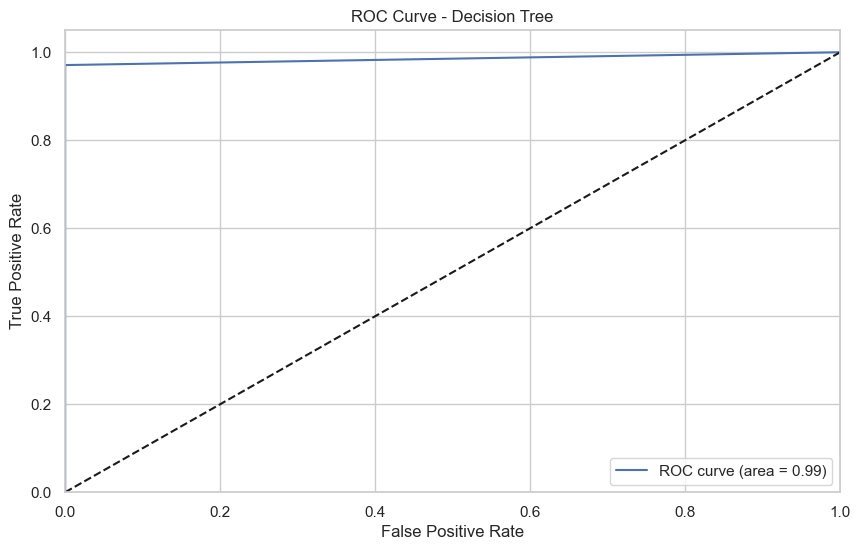

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label=f'ROC curve (area = {roc_auc_dt:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

### Matrice de confusion

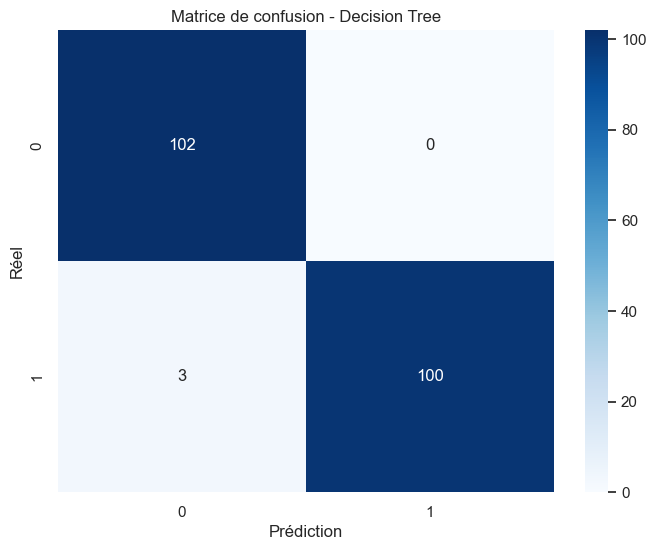

In [51]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion - Decision Tree')
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.show()

### Importance des variables

In [54]:
importances = decision_tree.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

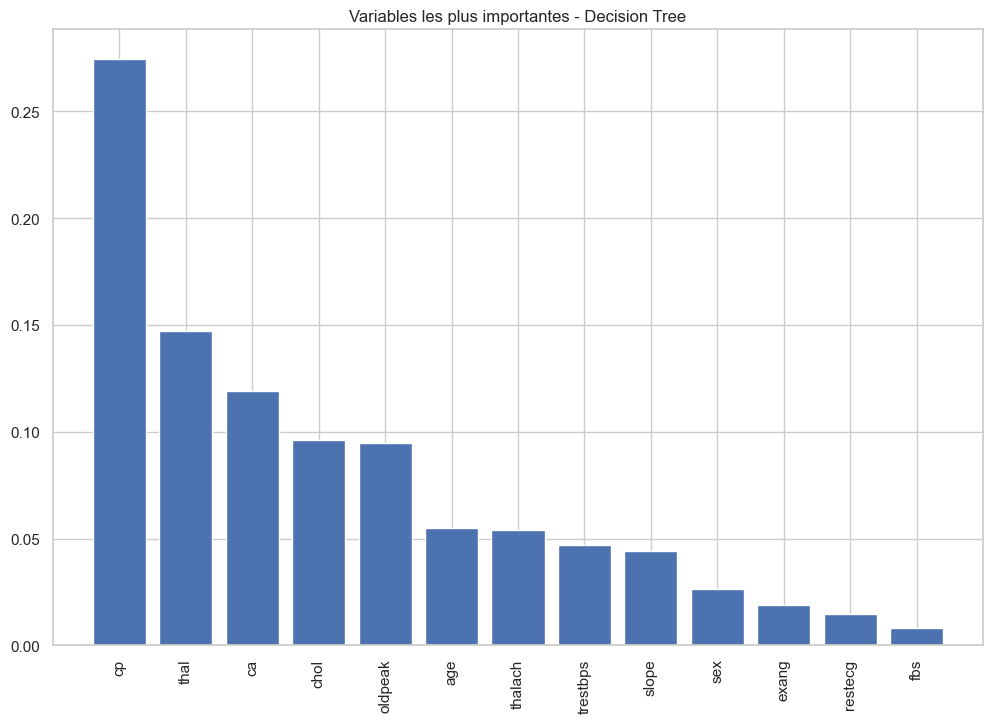

In [55]:
plt.figure(figsize=(12, 8))
plt.title('Variables les plus importantes - Decision Tree')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

## 2) Random Forest :

In [56]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Prédiction

In [57]:
y_pred_rf = random_forest.predict(X_test)
y_pred_proba_rf = random_forest.predict_proba(X_test)[:, 1]


### Evaluation

In [58]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)


In [59]:
print(f'ROC AUC: {roc_auc_rf}')
print(classification_report(y_test, y_pred_rf))

ROC AUC: 1.0
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



### Courbe de ROC

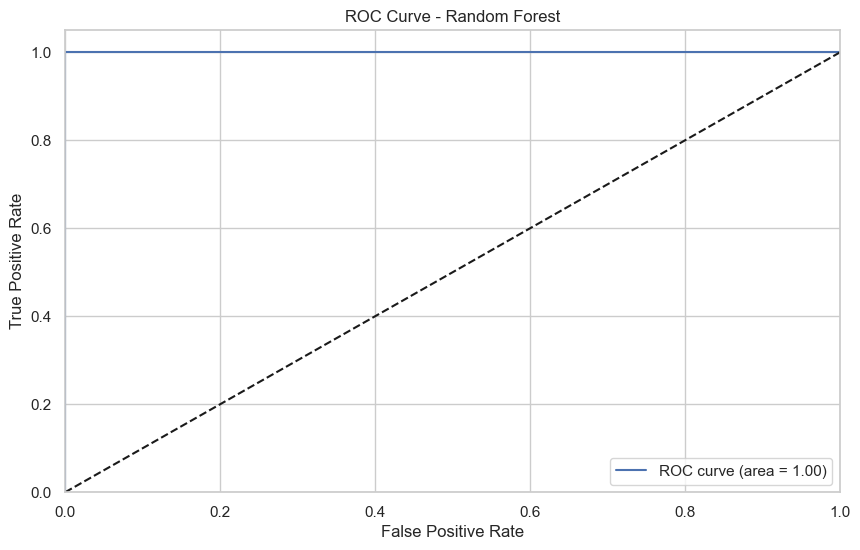

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'ROC curve (area = {roc_auc_rf:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


### Matrice de confusion 

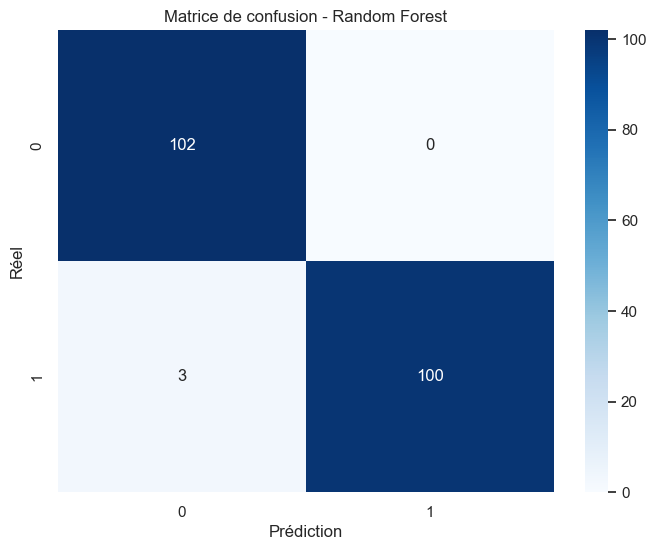

In [61]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion - Random Forest')
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.show()

### Importance des variables

In [62]:
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

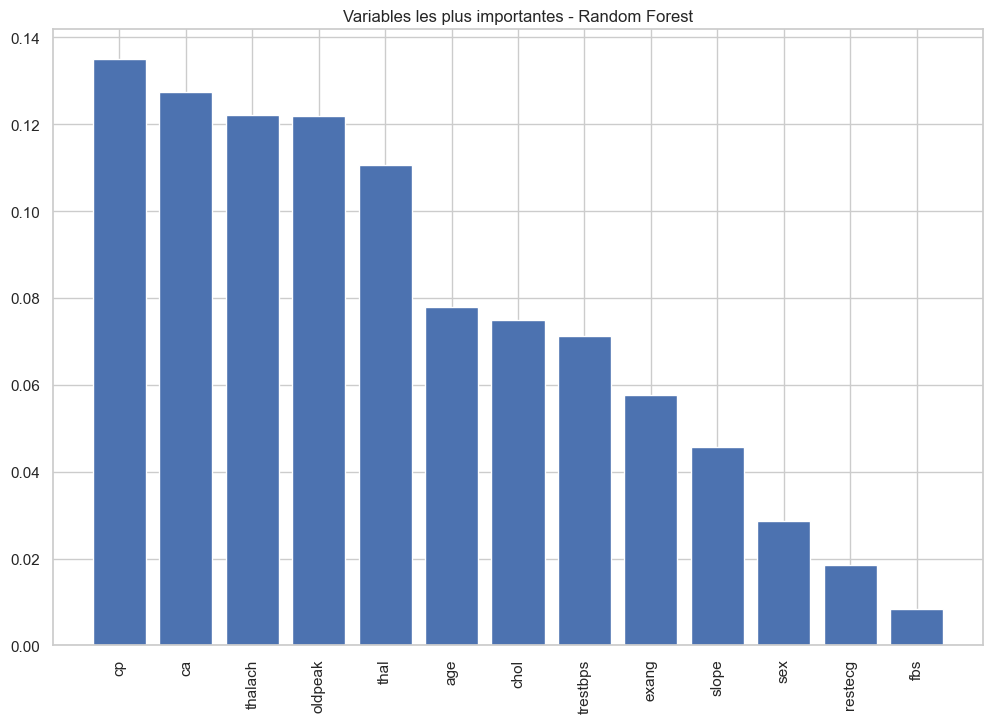

In [63]:
plt.figure(figsize=(12, 8))
plt.title('Variables les plus importantes - Random Forest')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

## 3) Régréssion Logistique

In [66]:
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)

LogisticRegression(random_state=42)

### Prédiction

In [67]:
y_pred_lr = logistic_regression.predict(X_test)
y_pred_proba_lr = logistic_regression.predict_proba(X_test)[:, 1]

### Evaluation

In [68]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

In [69]:
print(f'ROC AUC: {roc_auc_lr}')
print(classification_report(y_test, y_pred_lr))

ROC AUC: 0.8790215115172283
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



### Courbe de ROC

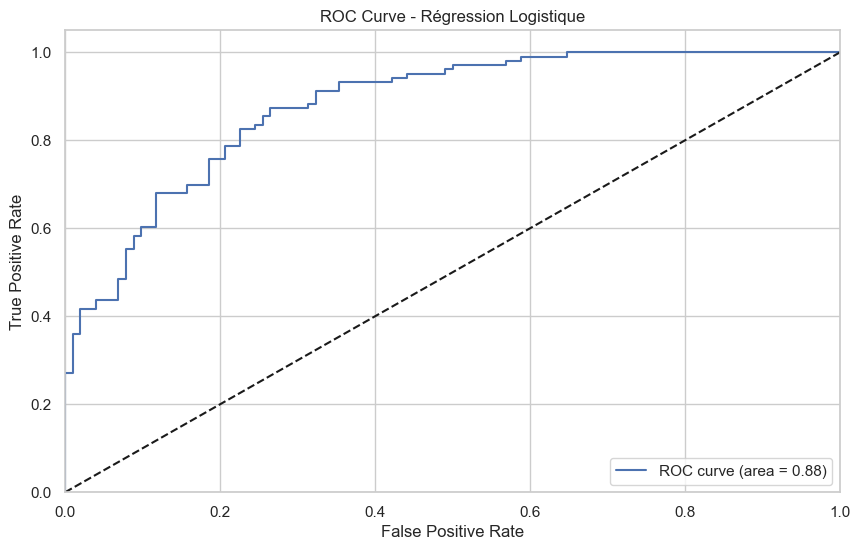

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'ROC curve (area = {roc_auc_lr:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Régression Logistique')
plt.legend(loc="lower right")
plt.show()

### Matrice de Confusion

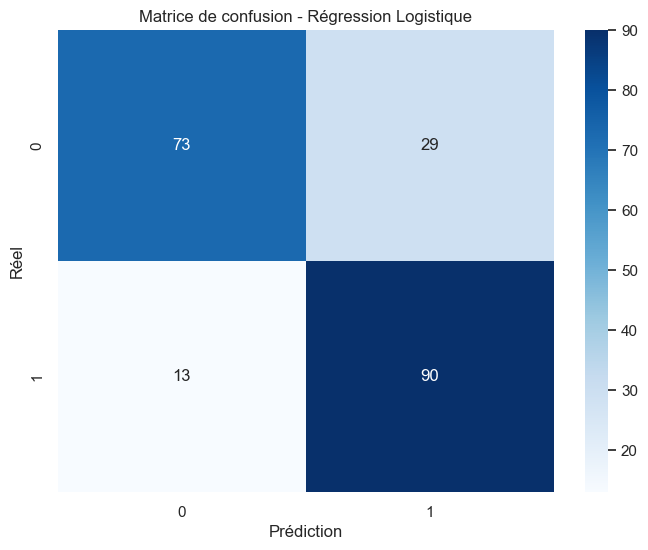

In [71]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion - Régression Logistique')
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.show()


### Importance des variables 

In [72]:
coefficients = logistic_regression.coef_[0]
indices = np.argsort(np.abs(coefficients))[::-1]
feature_names = X.columns

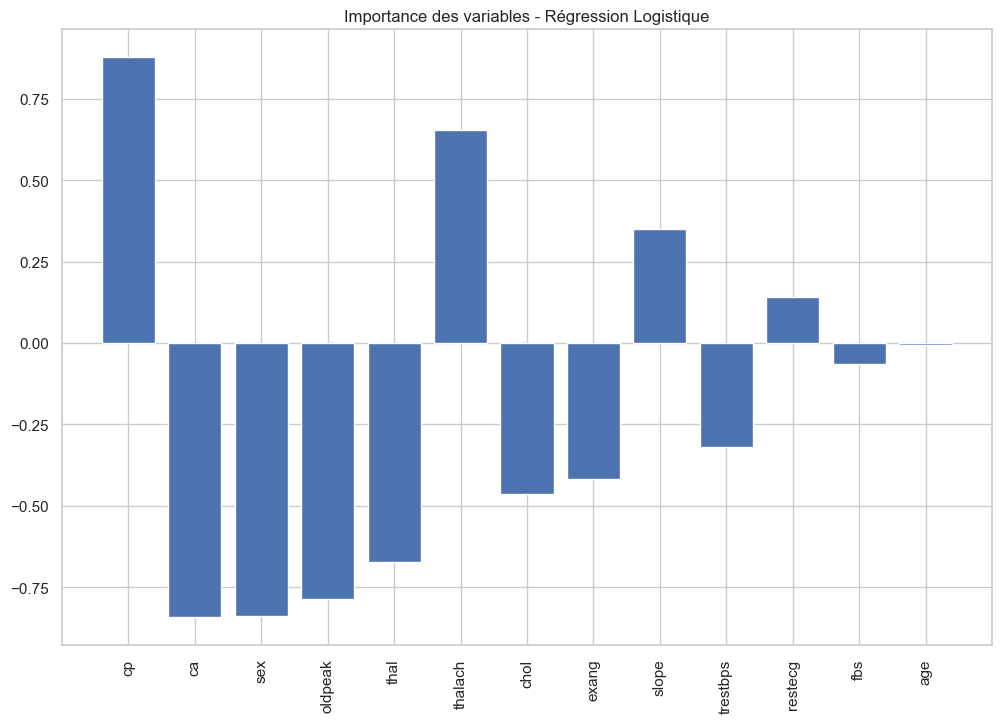

In [73]:
plt.figure(figsize=(12, 8))
plt.title('Importance des variables - Régression Logistique')
plt.bar(range(X.shape[1]), coefficients[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

## Mise en compétition des modèles

In [74]:
models = {
    'Decision Tree': (y_pred_dt, y_pred_proba_dt),
    'Random Forest': (y_pred_rf, y_pred_proba_rf),
    'Logistic Regression': (y_pred_lr, y_pred_proba_lr)
}

In [75]:
for model_name, (y_pred, y_pred_proba) in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    print(f'=== {model_name} ===')
    print(f'ROC AUC: {roc_auc}')
    print(classification_report(y_test, y_pred))

=== Decision Tree ===
ROC AUC: 0.9854368932038835
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

=== Random Forest ===
ROC AUC: 1.0
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

=== Logistic Regression ===
ROC AUC: 0.8790215115172283
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.

## Interprétation des résultats

#### Pour l'arbre de décision : 

L'arbre de décision montre d'excellentes performances avec une AUC de 0.985.
La précision et le rappel pour les deux classes sont très élevés, ce qui signifie que le modèle est très bon pour prédire correctement les cas positifs et négatifs.
L'exactitude globale de 99% indique que le modèle fait très peu d'erreurs

#### Pour le RandomForest : 

La forêt aléatoire a une AUC parfaite de 1.0, ce qui signifie qu'elle sépare parfaitement les classes positives et négatives.
Les précisions, rappels et F1-scores sont identiques à ceux de l'arbre de décision, suggérant que la forêt aléatoire est également extrêmement précise.
Une exactitude de 99% indique une performance exceptionnelle.

#### Pour la régréssion Logistique :

La régression logistique a une AUC de 0.879, ce qui est bon mais inférieur aux autres modèles.
Les précisions et les rappels sont corrects, mais pas aussi élevés que ceux de l'arbre de décision et de la forêt aléatoire.
L'exactitude de 80% montre que ce modèle est moins performant que les deux autres.

### Conclusion :

Les performances des trois modèles de classification (arbre de décision, forêt aléatoire et régression logistique) ont été évaluées pour prédire la présence de maladies cardiaques en utilisant des données médicales. Voici une analyse plus détaillée et linéaire des résultats obtenus.

Les résultats montrent que la forêt aléatoire a une performance exceptionnelle avec une AUC parfaite de 1.0. Cela signifie que ce modèle sépare parfaitement les classes positives et négatives, ce qui est extrêmement rare et indique un modèle très puissant. Les précisions et les rappels pour les deux classes sont très élevés, avec des scores F1 de 0.99 pour chaque classe. L'exactitude globale de 99% confirme que ce modèle fait très peu d'erreurs, ce qui en fait le modèle le plus performant parmi ceux testés.

L'arbre de décision, avec une AUC de 0.985, montre également des performances exceptionnelles. Bien que légèrement inférieur à la forêt aléatoire, ce modèle est très précis avec des précisions et des rappels proches de ceux de la forêt aléatoire. Les scores F1 de 0.99 pour chaque classe et une exactitude globale de 99% indiquent que l'arbre de décision est également un modèle très performant. Cependant, il peut être plus sensible aux variations des données d'entraînement et de test par rapport à la forêt aléatoire.

La régression logistique, avec une AUC de 0.879, montre des performances acceptables mais inférieures aux deux autres modèles. Les précisions et les rappels sont corrects, mais pas aussi élevés que ceux des modèles basés sur les arbres. Les scores F1 de 0.79 pour la classe 0 et de 0.82 pour la classe 1, avec une exactitude globale de 80%, montrent que ce modèle est moins performant. Cependant, la régression logistique offre une bonne interprétabilité des résultats, ce qui peut être utile dans des contextes où la compréhension des relations entre les variables et la cible est importante.

### Recommandations :

Pour la tâche de prédiction de la présence de maladies cardiaques, il est fortement recommandé d'utiliser la forêt aléatoire en raison de sa capacité à séparer parfaitement les classes. Ce modèle a montré une AUC parfaite de 1.0, des scores F1 élevés pour chaque classe et une exactitude globale de 99%, ce qui en fait le choix le plus robuste et précis. La forêt aléatoire est particulièrement adaptée aux problèmes de classification complexes comme celui-ci, où elle peut capturer les interactions non linéaires entre les variables.

L'arbre de décision est une bonne alternative si la complexité du modèle est une préoccupation ou si une interprétabilité visuelle est souhaitée. Bien qu'il soit légèrement moins performant que la forêt aléatoire, il offre des résultats très proches avec une AUC de 0.985 et une exactitude de 99%. L'arbre de décision peut être plus sensible aux variations des données, mais il reste un modèle très puissant.

La régression logistique pourrait être utilisée dans des scénarios où l'interprétabilité du modèle est cruciale. Bien que ses performances soient inférieures à celles des modèles basés sur les arbres, avec une AUC de 0.879 et une exactitude de 80%, elle offre une bonne compréhension des coefficients des variables, ce qui peut aider à identifier les facteurs de risque importants.

En résumé, la forêt aléatoire est le modèle le plus performant et devrait être utilisé pour la prédiction de la présence de maladies cardiaques dans ce contexte. L'arbre de décision peut être considéré comme une alternative valable, tandis que la régression logistique offre une meilleure interprétabilité au détriment de la performance.


## Sauvegarde du meilleur modèle

In [76]:
best_model_name = max(models, key=lambda name: auc(*roc_curve(y_test, models[name][1])[:2]))
if best_model_name == 'Decision Tree':
    best_model = decision_tree
elif best_model_name == 'Random Forest':
    best_model = random_forest
else:
    best_model = logistic_regression

In [77]:
dump(best_model, f'{best_model_name.lower().replace(" ", "_")}_heart_disease_model.joblib')
print(f'{best_model_name} model saved as {best_model_name.lower().replace(" ", "_")}_heart_disease_model.joblib')


Random Forest model saved as random_forest_heart_disease_model.joblib
